In [1]:
import andes
from andes.interop.pandapower import to_pandapower, make_link_table, runopp_map

In [2]:
from ev_ssm import ev_ssm

In [3]:
print(andes.__version__)

1.7.0.post172.dev0+gb99041fa


In [4]:
# ss0 is used for PP conversion
dir_path = os.path.abspath('..')
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=False,
                 default_config=False)

In [5]:
ssa.PFlow.run()

True

In [6]:
ssa.TDS.config.tf = 5
ssa.TDS.run()

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013  | 0.001
 GENROU_5  | 0.014  | 0.001
 GENROU_7  | 0.015  | 0.002
 GENROU_8  | 0.015  | 0.006
 GENROU_9  | 0.009  | 0.001
 GENROU_10 | 0.013  | 0.000




  0%|          | 0/100 [00:00<?, ?%/s]

True

In [7]:
gpref0 = ssa.TGOV1N.get(src='pref0', idx='TGOV1_1', attr='v')
epref0 = ssa.EV2.get(src='pref0', idx='EV_1', attr='v')

In [8]:
ssa.EV2.set(src='pref0', idx='EV_1', attr='v', value=epref0 + 0.1)
ssa.TGOV1N.set(src='pref0', idx='TGOV1_1', attr='v', value=gpref0+0.1)

True

In [9]:
ssa.TDS.config.tf = 20
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

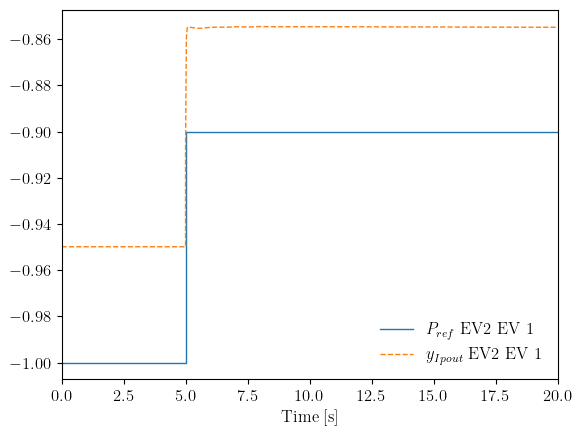

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [10]:
ssa.TDS.plt.plot([ssa.EV2.Pref, ssa.EV2.Ipout_y], a=(0))

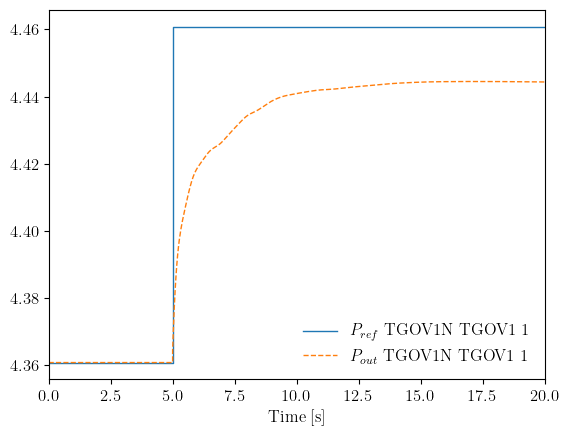

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [11]:
ssa.TDS.plt.plot([ssa.TGOV1N.pref, ssa.TGOV1N.pout], a=(0))